In [36]:
import re
import os
import glob
import pandas as pd
import numpy as np

In [37]:
path = os.getcwd() + '/data/'
files = glob.glob(path + "/*.csv")

for file in files:
    reg_name = file.split('\\')[-1].split('.')[0]
    globals()['{}'.format(reg_name)] = pd.read_csv(file)

In [38]:
alpha = jobs.iloc[0:179,:]
beta = jobs.iloc[364:466,:]
gamma = jobs.iloc[729:816,:]

In [39]:
data = pd.concat([alpha, beta, gamma], axis=0).reset_index(drop=True)
data

,시/도,시/군/구,기관명,주소,사회서비스형,시장형,취업알선형,시니어인턴십,공익활동
0,서울,성동구,(사)고령사회고용진흥원,우편번호: (072-99)\n주소: 서울특별시 영등포구 문래동3가 55-20 에...,0.0,0.0,1.0,1.0,0.0
1,서울,양천구,(사)나눔과보람복지회,우편번호: (079-38)\n주소: 서울특별시 양천구 신정동 883 양천시장주상...,NaN,NaN,NaN,NaN,NaN
2,서울,강남구,(사)대한노인회 강남구지회,우편번호: (060-65)\n주소: \n도로명주소: 서울특별시 강남구 선릉로 7...,NaN,NaN,NaN,NaN,NaN
3,서울,관악구,(사)하늘터노인복지회,우편번호: (088-46)\n주소: \n도로명주소: 서울특별시 관악구 방천길 3...,NaN,NaN,NaN,NaN,NaN
4,서울,영등포구,(사)한국가사노동자협회,우편번호: (072-65)\n주소: 서울특별시 영등포구 당산동1가 318\n도로...,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
363,대구,달서구,달서구월배노인복지센터,우편번호: (427-55)\n주소: 대구 달서구 월성동 1537\n도로명주소: ...,NaN,NaN,NaN,NaN,NaN
364,대구,달성군,달성군노인복지관,우편번호: (429-72)\n주소: 대구광역시 달성군 옥포면 기세리 264-1\...,0.0,0.0,0.0,0.0,1.0
365,대구,달성군,달성군북부노인복지관,우편번호: (429-16)\n주소: \n도로명주소: 대구광역시 달성군 다사읍 달...,NaN,NaN,NaN,NaN,NaN
366,대구,달성군,달성군청 주민복지국 복지정책과,우편번호: (429-74)\n주소: 대구광역시 달성군 논공읍 금포리 1313 달...,NaN,NaN,NaN,NaN,NaN


In [40]:
data.isna().sum()

시/도         0
시/군/구       0
기관명         0
주소          0
사회서비스형    127
시장형       127
취업알선형     127
시니어인턴십    127
공익활동      127
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시/도     368 non-null    object 
 1   시/군/구   368 non-null    object 
 2   기관명     368 non-null    object 
 3   주소      368 non-null    object 
 4   사회서비스형  241 non-null    float64
 5   시장형     241 non-null    float64
 6   취업알선형   241 non-null    float64
 7   시니어인턴십  241 non-null    float64
 8   공익활동    241 non-null    float64
dtypes: float64(5), object(4)
memory usage: 26.0+ KB


In [53]:
temp = data.groupby(['시/도', '시/군/구']).sum()
temp

사회서비스형  시장형  취업알선형  시니어인턴십  공익활동
시/도 시/군/구                                  
경기  고양시       1.0  1.0    3.0     1.0   1.0
    과천시       0.0  0.0    1.0     0.0   0.0
    광명시       0.0  0.0    1.0     0.0   0.0
    광주시       0.0  0.0    1.0     0.0   0.0
    구리시       1.0  0.0    0.0     0.0   1.0
...           ...  ...    ...     ...   ...
서울  은평구       1.0  1.0    1.0     0.0   3.0
    종로구       0.0  0.0    1.0     1.0   1.0
    중구        0.0  0.0    1.0     1.0   0.0
    중랑구       0.0  0.0    0.0     0.0   2.0
    직속        1.0  1.0    0.0     0.0   1.0

[68 rows x 5 columns]

In [70]:
temp_1 = data.groupby('시/도').sum()
temp_1

,사회서비스형,시장형,취업알선형,시니어인턴십,공익활동
시/도,,,,,
경기,47.0,30.0,44.0,6.0,51.0
광주,18.0,12.0,2.0,3.0,44.0
대구,16.0,13.0,5.0,6.0,19.0
서울,27.0,17.0,30.0,11.0,61.0


In [115]:
temp = data[data['시/도'] == '경기'].groupby( '시/군/구').sum()
temp

,사회서비스형,시장형,취업알선형,시니어인턴십,공익활동
시/군/구,,,,,
고양시,1.0,1.0,3.0,1.0,1.0
과천시,0.0,0.0,1.0,0.0,0.0
광명시,0.0,0.0,1.0,0.0,0.0
광주시,0.0,0.0,1.0,0.0,0.0
구리시,1.0,0.0,0.0,0.0,1.0
군포시,3.0,3.0,3.0,0.0,3.0
김포시,3.0,2.0,2.0,0.0,2.0
남양주시,3.0,2.0,2.0,0.0,3.0
동두천시,1.0,0.0,1.0,0.0,1.0


In [48]:
data[data['시/도'] == '서울'].isna().sum()

시/도         0
시/군/구       0
기관명         0
주소          0
사회서비스형    107
시장형       107
취업알선형     107
시니어인턴십    107
공익활동      107
dtype: int64

In [85]:
temp_1.T

시/도,경기,광주,대구,서울
사회서비스형,47.0,18.0,16.0,27.0
시장형,30.0,12.0,13.0,17.0
취업알선형,44.0,2.0,5.0,30.0
시니어인턴십,6.0,3.0,6.0,11.0
공익활동,51.0,44.0,19.0,61.0


In [91]:
matches =list(temp_1.columns.values)

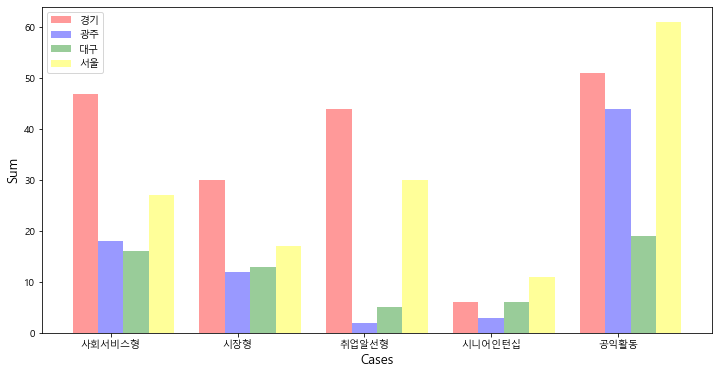

In [101]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

# 한글 설정
if platform.system() == "Darwin":
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    fontname = font_manager.FontProperties(fname="c:/windows/Fonts/malgun.ttf").get_name()
    rc('font', family = fontname)
else:
    pass

# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.2

# 연도가 4개이므로 0, 1, 2, 3 위치를 기준으로 삼음
index = np.arange(5)

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, temp_1.T['경기'], bar_width, alpha=0.4, color='red', label='경기')
b2 = plt.bar(index + bar_width, temp_1.T['광주'], bar_width, alpha=0.4, color='blue', label='광주')
b3 = plt.bar(index + 2 * bar_width, temp_1.T['대구'], bar_width, alpha=0.4, color='green', label='대구')
b3 = plt.bar(index + 3 * bar_width, temp_1.T['서울'], bar_width, alpha=0.4, color='yellow', label='서울')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
plt.xticks(np.arange(bar_width, 5 + bar_width, 1), matches)


# x축, y축 이름 및 범례 설정
plt.xlabel('Cases', size = 13)
plt.ylabel('Sum', size = 13)
plt.legend()
plt.show()

In [125]:
temp.

,사회서비스형,시장형,취업알선형,시니어인턴십,공익활동
시/군/구,,,,,
광산구,2.0,2.0,1.0,0.0,7.0
남구,5.0,3.0,0.0,0.0,13.0
동구,2.0,1.0,0.0,0.0,6.0
북구,3.0,3.0,1.0,2.0,10.0
서구,5.0,2.0,0.0,1.0,7.0
직속,1.0,1.0,0.0,0.0,1.0


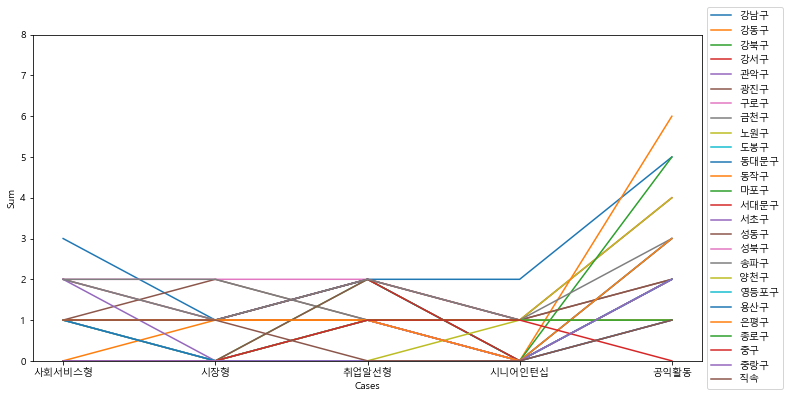

In [129]:
temp = data[data['시/도'] == '서울'].groupby( '시/군/구').sum()
temp

plt.figure(figsize=(12,6))
for i in range(len(temp)):
    plt.plot(matches, temp.iloc[i, :])
plt.legend(temp.index, loc='center left',bbox_to_anchor=(1, 0.5))
plt.ylim([0, 8])
plt.ylabel('Sum')
plt.xlabel('Cases')
plt.show()

In [102]:
temp_2.T

시/군/구,고양시,과천시,광명시,광주시,구리시,군포시,김포시,남양주시,동두천시,부천시,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,직속
사회서비스형,1.0,0.0,0.0,0.0,1.0,3.0,3.0,3.0,1.0,2.0,...,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
시장형,1.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
취업알선형,3.0,1.0,1.0,1.0,0.0,3.0,2.0,2.0,1.0,2.0,...,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
시니어인턴십,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
공익활동,1.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,1.0,4.0,...,1.0,3.0,1.0,2.0,1.0,3.0,1.0,0.0,2.0,1.0


In [112]:
temp_2.index

Index(['고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시', '부천시',
       '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시', '연천군',
       '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '포천시', '화성시', '광산구', '남구',
       '동구', '북구', '서구', '직속', '남구', '달서구', '달성군', '동구', '북구', '서구', '수성구',
       '중구', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구', '직속'],
      dtype='object', name='시/군/구')